# Selecting areas of interest for our reporting - incidents after 2010, pipelines installed after 2010

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df_raw = pd.read_csv('../data/processed/pipeline_incidents_2010_present_all_CLEAN.csv')
df_raw.head()

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade
0,2/28/22,NO,YES,NO,20100001,15047,3/11/10,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,"PG&E - GAS OPERATIONS, REGULATORY COMPLIANCE 6...",SAN RAMON,CA,94583,2/13/10 23:35,NaN,NaN,2010,1617 EAST 9TH STREET,STOCKTON,SAN JOAQUIN,CA,95201,37.93188,-121.26133,102500,124764.082311,NO,0,0.0,0,OTHER OUTSIDE FORCE DAMAGE,OTHER OUTSIDE FORCE DAMAGE,OTHER,ALUMINUN,A FIRE AT AN UNOCCUPIED HOME OCCURRED AT APPRO...,10.0,NaN,NaN
1,2/28/22,NO,NO,NO,20100002,15553,3/12/10,SUPPLEMENTAL FINAL,13730,NORTHERN INDIANA PUBLIC SERVICE CO,801 E 86TH AVENUE,MERRILLVILLE,IN,46410,2/16/10 10:38,NaN,NaN,2010,3835 SANDPIPER COVE RUN,SOUTH BEND,ST. JOSEPH,IN,46628,41.72931,-86.27531,57500,68334.121206,NO,0,20.0,0,EXCAVATION DAMAGE,EXCAVATION DAMAGE BY THIRD PARTY,PLASTIC,NaN,"CONTRACTOR BORING ELECTRIC LINE PARALLEL TO 3""...",310.0,1990-01-01,1990-1999
2,2/28/22,NO,NO,NO,20100003,15023,3/15/10,SUPPLEMENTAL FINAL,31840,UNISOURCE ENERGY SERVICES,2901 W. SHAMRELL BLVD.,FLAGSTAFF,AZ,86001,2/22/10 20:57,NaN,NaN,2010,8725 COUNTRY CLUB DRIVE,PINETOP,NAVAJO,AZ,85935,34.10934,-109.86010,2648,3173.508982,NO,0,NaN,0,NATURAL FORCE DAMAGE,OTHER NATURAL FORCE DAMAGE,STEEL,NaN,ON 2/22/10 PINETOP FIRE DEPARTMENT RESPONDED T...,14.0,1999-01-01,1990-1999
3,2/28/22,NO,YES,YES,20100004,15003,3/16/10,ORIGINAL FINAL,13710,NORTHERN ILLINOIS GAS CO,"P.O. BOX 190, RT 59 & I-88",AURORA,IL,60507,2/18/10 19:05,NaN,NaN,2010,359 HAWTHORNE CIRCLE,MOUNT PROSPECT,COOK,IL,60056,42.03668,-87.94307,22005,26781.407382,YES,1,NaN,0,CORROSION FAILURE,EXTERNAL CORROSION,COPPER,NaN,CREW WAS DIGGING A HOLE TO FIX A SERVICE LINE ...,1.0,1976-01-01,1970-1979
4,2/28/22,NO,YES,YES,20100005,15639,3/22/10,SUPPLEMENTAL FINAL,6141,NEW MEXICO GAS COMPANY,"7120 WYOMING BLVD. NE STE, 20",ALBUQUERQUE,NM,87109,2/21/10 1:38,NaN,NaN,2010,303 COUNTY RD. 6100,KIRTLAND,SAN JUAN,NM,87417,36.74350,-108.33380,4843,5871.773935,YES,1,0.0,0,OTHER OUTSIDE FORCE DAMAGE,"DAMAGE BY CAR, TRUCK, OR OTHER MOTORIZED VEHIC...",STEEL,NaN,A SAN JUAN COUNTY DEPUTY SHERIFF WAS IN PURSUI...,5625.0,NaN,NaN


In [3]:
# Convert installation_year column to datetime
df_raw['installation_year'] = pd.to_datetime(df_raw['installation_year'], format='%Y-%m-%d')

In [4]:
# Filter install_year to post 2010
df = df_raw[df_raw.installation_year >= '2010-01-01']

## Cities with most pipeline accidents

In [5]:
df.location_city_name.value_counts().head(20)

DALLAS                       4
Not Within a Municipality    3
HOUSTON                      2
NEW YORK                     2
ATLANTA                      2
CHICAGO                      2
SAN FRANCISCO                2
DURHAM                       2
FORT WORTH                   2
AUSTIN                       1
BELLEVUE                     1
WAPPINGERS FALLS             1
ABERDEEN                     1
LOS ANGELES                  1
MARIETTA                     1
EXCELSIOR                    1
MIAMI BEACH                  1
PEPPER PIKE                  1
NORTH BERGEN                 1
BROOKLYN                     1
Name: location_city_name, dtype: int64

## Cities with highest total costs for pipeline accidents (adjusted for inflation)
total_cost variable would give us the estimated total cost

In [6]:
df_highest_cost = df.groupby(['location_city_name', 'location_state_abbreviation']).total_cost_current.agg(['sum', 'count']).reset_index()
df_plot = df_highest_cost.sort_values('sum', ascending=False)
df_plot.head(20)

,location_city_name,location_state_abbreviation,sum,count
5,ATLANTA,GA,1.033171e+07,2
101,PEPPER PIKE,OH,9.307204e+06,1
79,MELVINDALE,MI,6.073367e+06,1
23,CANTON,IL,4.841442e+06,1
87,NEW YORK,NY,3.651720e+06,2
69,LAWRENCE,MA,2.749868e+06,1
13,BERWYN,IL,2.522560e+06,1
41,ELLICOTT CITY,MD,1.915530e+06,1
139,WOODBURY,MN,1.587926e+06,1
110,SAN FRANCISCO,CA,1.182680e+06,2


In [7]:
df_plot.sort_values('count', ascending=False).head(10)

,location_city_name,location_state_abbreviation,sum,count
34,DALLAS,TX,1.014738e+06,4
5,ATLANTA,GA,1.033171e+07,2
58,HOUSTON,TX,1.651287e+04,2
25,CHICAGO,IL,1.333028e+05,2
87,NEW YORK,NY,3.651720e+06,2
110,SAN FRANCISCO,CA,1.182680e+06,2
47,FORT WORTH,TX,4.953943e+05,2
40,DURHAM,NC,3.934316e+05,2
84,MT. MORRIS,MI,6.011752e+04,1
109,RUIDOSO,NM,6.178651e+04,1


array([[<AxesSubplot:title={'center':'sum'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

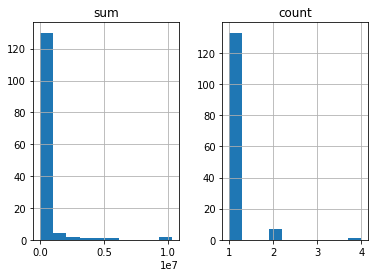

In [8]:
df_plot.hist()

# the vast majority of towns had incidents that were not particularly expensive.
# use 1M as a cut off -- ask source? about a good cut off?


## Examples

### Atl

In [9]:
df[df.location_city_name == 'ATLANTA']

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade
1109,2/28/22,NO,NO,NO,20200028,33370,2/25/20,ORIGINAL FINAL,792,ATLANTA GAS LIGHT CO,10 PEACHTREE PLACE NE,ATLANTA,GA,30309,1/28/20 11:08,NaN,NaN,2020,LINKWOOD RD AT MARTIN LUTHER KING JR RD,ATLANTA,FULTON,GA,30311,33.754582,-84.481799,4340,4.419770e+03,NO,0,0.0,0,EXCAVATION DAMAGE,EXCAVATION DAMAGE BY THIRD PARTY,PLASTIC,NaN,A 4-INCH PLASTIC NATURAL GAS MAIN WAS RUPTURED...,162.2,2011-01-01,>2010
1259,2/28/22,YES,NO,NO,20210074,36094,8/30/21,SUPPLEMENTAL FINAL,792,ATLANTA GAS LIGHT CO,10 PEACHTREE PLACE NE,ATLANTA,GA,30309,8/4/21 21:52,EASTERN,YES,2021,2124 CHESHIRE BRIDGE ROAD NE,ATLANTA,FULTON,GA,30324,33.813098,-84.354187,10327292,1.032729e+07,NO,0,50.0,0,OTHER OUTSIDE FORCE DAMAGE,"NEARBY INDUSTRIAL, MAN-MADE, OR OTHER FIRE/EXP...",PLASTIC,NaN,THE COMPANY'S 24/7 EMERGENCY CALL CENTER RECEI...,6690.0,2021-01-01,>2010


In [10]:
# set option to print the full narrative
with pd.option_context('display.max_colwidth', -1):
    print(df[df.location_city_name == 'ATLANTA'].narrative)

1109    A 4-INCH PLASTIC NATURAL GAS MAIN WAS RUPTURED BY A CONTRACT CREW WHILE INSTALLING TELECOMMUNICATIONS CONDUIT BY DIRECTIONAL DRILLING. ONCE THE INCIDENT WAS MADE SAFE IT WAS IDENTIFIED THAT THE FIRE DEPARTMENT HAD STOPPED THE RAILROAD FOR MORE THAN THE 20-MINUTE THRESHOLD THE COMPANY HAS IN ITS OPERATIONS PROCEDURE MANUAL (OPM) FOR REPORTING WHERE THE NATIONAL RESPONSE CENTER (NRC) WAS CONTACTED AT THAT TIME. NOTIFICATION TO THE ONE-CALL CENTER WAS MADE, HOWEVER, IT APPEARS THE LOCATE TICKET HAD EXPIRED AND THE MARKS AT THE JOB SITE WERE FADED. IN ADDITION, THE FADED MARKS APPEARED TO BE MIS-LOCATED BY APPROXIMATELY 6-INCHES WHERE THE EXCAVATOR HAD FAILED TO POTHOLE TO DETERMINE THE PROXIMITY OF THE PIPELINE.     ADDITIONAL NRC REPORT NUMBER 1269835 WAS CREATED FOR THE SAME EVENT AFTER A SUPPLEMENTAL CALL WAS PLACED WITH THE NRC TO UPDATE THE INITIAL TELEPHONIC NOTICE.                                                                                                               

### Pepper Pike

In [11]:
df[df.location_city_name == 'PEPPER PIKE']

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade
1077,2/28/22,NO,YES,NO,20190142,34601,12/14/19,SUPPLEMENTAL FINAL,4060,DOMINION ENERGY OHIO,1201 EAST 55TH STREET,CLEVELAND,OH,44103,11/15/19 1:01,NaN,NaN,2019,28000 SHAKER BLVD,PEPPER PIKE,CUYAHOGA,OH,44124,41.479437,-81.483215,8947405,9.307204e+06,NO,0,40.0,0,MATERIAL FAILURE OF PIPE OR WELD,BUTT WELD,STEEL,NaN,ON 11-15-19 DOMINION WAS NOTIFIED BY THE LOCAL...,13179.0,2019-01-01,>2010


In [12]:
with pd.option_context('display.max_colwidth', -1):
    print(df[df.location_city_name == 'PEPPER PIKE'].narrative)

1077    ON 11-15-19 DOMINION WAS NOTIFIED BY THE LOCAL FIRE DEPARTMENT AT 1:01 AM OF A FIRE ON OR NEAR THE OPERATORS PIPELINE. DEO CONFIRMED THAT THE FIRE WAS OCCURRING ON ITS FACILITIES AT APPROXIMATELY 1:45 AM BASED ON COMMUNICATIONS WITH FIELD OPERATIONS AND GAS CONTROL. THE LINE WAS ISOLATED AND FIRE EXTINGUISHED AT 3:30AM. THERE WERE NO INJURIES, FATALITIES, OR STRUCTURE DAMAGES. THE 30 INCH STEEL MAIN HAD BEEN RECENTLY INSTALLED, AND THE LOCATION OF THE RELEASE WAS AT A ROAD CROSSING AUGURED UNDER THE ROAD INSTALLED AT APPROXIMATELY 14.5FT. DEEP ON THE SOUTH END TO APPROXIMATELY 21FT. DEEP ON THE NORTH END. ON 11-24-19 THE FAILED SECTION WAS REMOVED AND CONFIRMED THAT THE RELEASE OF GAS HAD OCCURRED AT A GIRTH WELD FAILURE. IN COOPERATION WITH THE PUCO, THE FAILED SECTION OF THE PIPELINE (ALONG WITH ADDITIONAL SECTIONS IMMEDIATELY UPSTREAM AND DOWNSTREAM OF THE SECTION CONTAINING ADDITIONAL WELDS FOR TESTING) WERE EXTRACTED AND RETAINED BY DNV FOR METALLURGICAL ANALYSIS. THE PROT

### Melvindale

In [13]:
df[df.location_city_name == 'MELVINDALE']

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade
680,2/28/22,NO,YES,YES,20160064,16482,8/11/16,SUPPLEMENTAL FINAL,12408,DTE GAS COMPANY,ONE ENERGY PLAZA,DETROIT,MI,48226,7/2/16 3:03,NaN,NaN,2016,3900 GREENFIELD,MELVINDALE,WAYNE COUNTY,MI,48122,42.293083,-83.17532,5512261,6.073367e+06,YES,1,1000.0,0,OTHER OUTSIDE FORCE DAMAGE,"DAMAGE BY CAR, TRUCK, OR OTHER MOTORIZED VEHIC...",STEEL,NaN,"ON JULY 2, 2016 AT 02:59 DTE GAS WAS NOTIFIED ...",24010.0,2010-01-01,>2010


In [14]:
with pd.option_context('display.max_colwidth', -1):
    print(df[df.location_city_name == 'MELVINDALE'].narrative)

680    ON JULY 2, 2016 AT 02:59 DTE GAS WAS NOTIFIED OF A FIRE FROM THE MELVINDALE FIRE DEPARTMENT AT 3900 GREENFIELD IN MELVINDALE, MI.  THE DTE GAS SERVICE TECHNICIAN TEAM ARRIVED ONSITE AT 03:10 AND IT WAS CONFIRMED THAT A VEHICLE HAD HIT ABOVE GROUND PIPING OF A  3" NIPPLE ON A BLOW-OFF  WHICH LEAD TO A RUPTURE OF A 30-INCH PIPELINE OPERATING AT 540 PSIG AT THE DTE GAS RIVER ROUGE FACILITY. DTE GAS COORDINATED WITH FIRST RESPONDERS TO CONTAIN THE INCIDENT. IT WAS DETERMINED THAT THE VEHICLE CROSSED THROUGH THE STATION YARD AND STRUCK THE 3" NIPPLE ON A BLOW-OFF, THE LEAKING GAS DID IGNITE WHICH CAUSE THE 30-INCH PIPELINE RUPTURE. THERE WAS ONE INJURY TO THE DRIVER. THE DRIVER APPEARS TO HAVE BEEN INTOXICATED PRIOR TO THE VEHICLE STRIKING THE 3" NIPPLE ON A BLOW-OFF. DTE GAS CONTROL WAS ABLE TO CLOSE THE REMOTE VALVE AND THE LEAKING GAS WAS STOPPED. AS A RESULT OF THE INCIDENT, OAKWOOD HOSPITAL, DEARBORN INDUSTRIAL GENERATION AND MARATHON DETROIT REFINERY WERE WITHOUT HIGH PRESSURE 

### Canton

In [15]:
df[df.location_city_name == 'CANTON']

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade
734,2/28/22,NO,YES,YES,20160126,31221,12/16/16,SUPPLEMENTAL FINAL,32513,AMEREN ILLINOIS COMPANY,10 EXECUTIVE DR.,COLLINSVILLE,IL,62234,11/16/16 17:44,NaN,NaN,2016,50 N. 1ST AVENUE,CANTON,FULTON,IL,61520,40.556604,-90.033663,4383446,4.841442e+06,YES,4,50.0,1,EXCAVATION DAMAGE,EXCAVATION DAMAGE BY THIRD PARTY,PLASTIC,NaN,FINAL UPDATE 11/21/2018 - THE TOTAL DAMAGES IN...,33.29,2012-01-01,>2010


In [16]:
with pd.option_context('display.max_colwidth', -1):
    print(df[df.location_city_name == 'CANTON'].narrative)

734    FINAL UPDATE 11/21/2018 - THE TOTAL DAMAGES IN PART D,2.D. ARE UPDATED TO SHOW BEST KNOWN PUBLIC DAMAGE ESTIMATES.    SUPPLEMENTAL UPDATE 06/01/2017 - THE NUMBER OF INJURIES REQUIRING INPATIENT HOSPITALIZATION WAS UPDATED, INCLUDING A MEMBER OF THE PUBLIC AND AN AMEREN ILLINOIS CONTRACT LOCATOR.  THE DOLLAR AMOUNT OF PUBLIC DAMAGES IS STILL THE BEST KNOWN ESTIMATE.     SUPPLEMENTAL UPDATE 03/16/2017 - ESTIMATE OF $5MM PUBLIC DAMAGE ADDED. THIS IS UNSUBSTANTIATED ESTIMATE AND WILL BE UPDATED ONCE BETTER INFORMATION IS KNOWN.     A THIRD PARTY CONTRACTOR WAS DIRECTIONAL BORING TO INSTALL TELECOMMUNICATION UTILITY FACILITIES AND HIT AN AMEREN ILLINOIS (AIC) GAS FACILITY. AIC RESPONDED TO THE HIT FACILITY AND HAD FOUR EMPLOYEES WORKING AT THE SCENE WHEN THE BUILDING AT 50 N 1ST AVENUE EXPLODED. ONE AIC EMPLOYEE WAS KILLED AND THREE WERE INJURED, TWO OF WHICH REQUIRED INPATIENT HOSPITALIZATION.    ADDITIONAL CONTRIBUTING FACTORS TO THE INCIDENT ARE CURRENTLY UNDER INVESTIGATION BY TH

### NY

In [17]:
df[df.location_city_name == 'NEW YORK']

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade
450,2/28/22,NO,YES,YES,20140031,16185,4/11/14,SUPPLEMENTAL FINAL,2704,CONSOLIDATED EDISON CO OF NEW YORK,4 IRVING PLACE,NEW YORK,NY,10003,3/12/14 9:31,NaN,NaN,2014,1644/1646 PARK AVENUE,NEW YORK,NEW YORK,NY,10035-4645,40.799726,-73.943401,2960200,3.339637e+06,YES,48,100.0,8,NATURAL FORCE DAMAGE,"EARTH MOVEMENT, NOT DUE TO HEAVY RAINS/FLOODS",PLASTIC,NaN,"DESCRIPTION OF INCIDENT: ON MARCH 12, 2014 ...",30.0,2011-01-01,>2010
947,2/28/22,NO,YES,NO,20180124,31410,12/24/18,SUPPLEMENTAL FINAL,2704,CONSOLIDATED EDISON CO OF NEW YORK,4 IRVING PLACE,NEW YORK,NY,10003,11/25/18 18:17,NaN,NaN,2018,2465 BROADWAY,NEW YORK,NEW YORK,NY,10025,40.791980,-73.974370,293914,3.120836e+05,NO,0,50.0,0,OTHER OUTSIDE FORCE DAMAGE,ELECTRICAL ARCING FROM OTHER EQUIPMENT OR FACI...,PLASTIC,NaN,"ON NOVEMBER 25, 2018, AT 16:44, CON EDISON'S G...",6.0,2015-01-01,>2010


In [18]:
with pd.option_context('display.max_colwidth', -1):
    print(df[df.location_city_name == 'NEW YORK'].narrative)

450    DESCRIPTION OF INCIDENT:    ON MARCH 12, 2014 AT APPROXIMATELY 09:31 TWO MULTI-USE, FIVE-STORY BUILDINGS AT 1644 AND 1646 PARK AVENUE (WEST SIDE OF PARK AVENUE BETWEEN E. 116TH AND E. 117TH STREETS), NEW YORK, NY, WERE DESTROYED BY AN EXPLOSION AND FIRE.  EIGHT FATALITIES AND APPROXIMATELY 48 REPORTED INJURIES RESULTED FROM THE EXPLOSION AND COLLAPSE.    CON EDISON'S RESPONSE AND ACTION:    AT 09:13 ON MARCH 12, 2014, CON EDISON'S GAS EMERGENCY RESPONSE CENTER (GERC) RECEIVED A TELEPHONE REPORT FROM CON EDISON'S CALL CENTER OF AN INSIDE AND OUTSIDE GAS ODOR AT 1652 PARK AVENUE.  AT 09:15, GERC DISPATCHED A GAS DISTRIBUTION SERVICES (GDS) MECHANIC TO INVESTIGATE THE ODOR REPORT.  AT 09:34, GERC CONFIRMED WITH NEW YORK CITY FIRE DEPARTMENT (FDNY) A SCANNER REPORT OF AN EXPLOSION AND BUILDING COLLAPSE AT E. 114TH ST. AND PARK AVENUE (THE E. 114TH ST. LOCATION WAS INCORRECT).  AT 09:38, THE GDS MECHANIC ENROUTE TO 1652 PARK AVENUE REPORTED OBSERVING SMOKE, FLAMES, AND HEAVY ACTIVITY

## Cities with highest fatalities and injuries

In [19]:
df_injure_fatal = df.groupby(['location_city_name', 'location_state_abbreviation']).agg({'fatal' : ['sum'], 'injure' : ['sum', 'count']})
df_injure_fatal.head(2)

fatal injure      
                                                 sum    sum count
location_city_name location_state_abbreviation                   
ABERDEEN           ID                              0      0     1
ADDIS              LA                              0      1     1

In [20]:
# remove multi index
df_injure_fatal.columns = df_injure_fatal.columns.droplevel()
df_injure_fatal = df_injure_fatal.reset_index()

# rename columns
df_injure_fatal.columns = ['location_city_name',
                           'location_state_abbreviation',
                           'fatal_sum',
                           'injure_sum',
                           'accident_count']


df_injure_fatal.head()

,location_city_name,location_state_abbreviation,fatal_sum,injure_sum,accident_count
0,ABERDEEN,ID,0,0,1
1,ADDIS,LA,0,1,1
2,AKRON,OH,0,0,1
3,ALLEN,TX,0,0,1
4,ALTA,UT,0,0,1


In [21]:
# Cities with most injuries
df_injure_fatal.sort_values('injure_sum', ascending=False).head(20)

,location_city_name,location_state_abbreviation,fatal_sum,injure_sum,accident_count
87,NEW YORK,NY,8,48,2
36,DETROIT,MI,0,6,1
23,CANTON,IL,1,4,1
74,LOST HILLS,CA,0,3,1
19,BROOKLYN,NY,0,2,1
123,SWIFTWATER,PA,1,2,1
34,DALLAS,TX,0,2,4
9,BAYONNE,NJ,0,2,1
70,LAWRENCE TWP.,NJ,0,1,1
79,MELVINDALE,MI,0,1,1


In [22]:
# Cities with most fatalities
df_injure_fatal.sort_values('fatal_sum', ascending=False).head(20)

,location_city_name,location_state_abbreviation,fatal_sum,injure_sum,accident_count
87,NEW YORK,NY,8,48,2
123,SWIFTWATER,PA,1,2,1
65,LAKE CHARLES,LA,1,0,1
39,DUNMORE,PA,1,0,1
17,BRADENTON,FL,1,1,1
62,JACKSONVILLE,AR,1,0,1
23,CANTON,IL,1,4,1
73,LOS ANGELES,CA,1,1,1
99,PAGOSA SPRINGS,CO,0,0,1
100,PALATKA,FL,0,0,1


## Incidents with highest fatalities and injuries

In [23]:
# Specific incidents with most fatalities
df.sort_values('fatal', ascending=False).head(10)

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade
450,2/28/22,NO,YES,YES,20140031,16185,4/11/14,SUPPLEMENTAL FINAL,2704,CONSOLIDATED EDISON CO OF NEW YORK,4 IRVING PLACE,NEW YORK,NY,10003,3/12/14 9:31,NaN,NaN,2014,1644/1646 PARK AVENUE,NEW YORK,NEW YORK,NY,10035-4645,40.799726,-73.943401,2960200,3.339637e+06,YES,48,100.0,8,NATURAL FORCE DAMAGE,"EARTH MOVEMENT, NOT DUE TO HEAVY RAINS/FLOODS",PLASTIC,NaN,"DESCRIPTION OF INCIDENT: ON MARCH 12, 2014 ...",30.0,2011-01-01,>2010
2110,2/28/22,NaN,YES,YES,20160054,31659,6/30/16,SUPPLEMENTAL FINAL,31594,SOUTHCROSS CCNG TRANSMISSION LTD,2103 CITYWEST BLVD. SUITE 900,HOUSTON,TX,77042,4/12/16 12:15,NaN,NaN,2016,NaN,NaN,NaN,NaN,NaN,28.173489,-97.283219,1845,1.705755e+03,YES,1,0.0,2,EQUIPMENT FAILURE,OTHER EQUIPMENT FAILURE,CARBON STEEL,NaN,THE INCIDENT OCCURRED DURING THE COMPLETION OF...,738.0,2016-01-01,>2010
53,2/28/22,YES,NO,NO,20100062,15530,8/17/10,SUPPLEMENTAL FINAL,18484,SOUTHERN CALIFORNIA GAS CO,555 WEST FIFTH STREET,LOS ANGELES,CA,90013,7/30/10 6:49,NaN,NaN,2010,890 E 59TH STREET,LOS ANGELES,LOS ANGELES,CA,90001,33.986780,-118.259640,2000,2.434421e+03,YES,1,100.0,1,OTHER OUTSIDE FORCE DAMAGE,"NEARBY INDUSTRIAL, MAN-MADE, OR OTHER FIRE/EXP...",OTHER,ILLEGAL COPPER BYPASS,"ON JULY 30, AT APPROXIMATELY 6:50 AM, AN EXPLO...",0.0,2010-01-01,>2010
1830,2/28/22,NaN,YES,YES,20140071,16460,6/30/14,SUPPLEMENTAL FINAL,31968,WTG GAS TRANSMISSION COMPANY,303 VETERANS AIRPARK LANE,MIDLAND,TX,79705,6/1/14 19:45,NaN,NaN,2014,NaN,NaN,NaN,NaN,NaN,32.220428,-102.104747,7970,8.991874e+03,NO,0,0.0,1,EQUIPMENT FAILURE,THREADED CONNECTION/COUPLING FAILURE,CARBON STEEL,NaN,WTG GAS TRANSMISSION COMPANY WAS IN THE PROCES...,0.0,2013-01-01,>2010
1134,2/28/22,NO,YES,YES,20200057,34645,6/18/20,SUPPLEMENTAL FINAL,4499,CENTERPOINT ENERGY RESOURCES CORPORATION,1111 LOUISIANA ST,HOUSTON,TX,77002,5/28/20 14:03,CENTRAL,YES,2020,401 WEST MCNEESE ST,LAKE CHARLES,CALCASIEU,LA,70605,30.175900,-93.224400,73854,7.532606e+04,NO,0,0.0,1,OTHER OUTSIDE FORCE DAMAGE,"DAMAGE BY CAR, TRUCK, OR OTHER MOTORIZED VEHIC...",STEEL,NaN,VEHICLE LEFT THE ROADWAY AND MADE IMPACT TO CE...,11.0,2012-01-01,>2010
1197,2/28/22,NO,YES,YES,20210001,35863,1/2/21,SUPPLEMENTAL FINAL,15348,PEOPLES GAS SYSTEM INC,PO BOX 2562,TAMPA,FL,33601,12/3/20 17:11,EASTERN,NO,2020,8TH STREET CT. WEST @ 30TH AVENUE WEST,BRADENTON,MANATEE,FL,34205,27.473781,-82.570472,128973,1.315322e+05,YES,1,205.0,1,EXCAVATION DAMAGE,EXCAVATION DAMAGE BY THIRD PARTY,PLASTIC,NaN,"DAMAGED 2"" PE MAIN BY THIRD PARTY NEXT GENERAT...",224.0,2014-01-01,>2010
1206,2/28/22,NO,YES,YES,20210013,34759,1/24/21,ORIGINAL,20010,"UGI UTILITIES, INC",1 UGI DRIVE,DENVER,PA,17517,12/25/20 1:30,EASTERN,NO,2020,117 LOWER SWIFTWATER ROAD,SWIFTWATER,MONROE,PA,18370,41.095368,-75.326474,62165,6.336155e+04,YES,2,2.0,1,OTHER INCIDENT CAUSE,UNKNOWN,PLASTIC,NaN,"AT APPROXIMATELY 1:44 AM DECEMBER 25, 2020, UG...",975.0,2019-01-01,>2010
1219,2/28/22,NO,YES,YES,20210028,34968,3/8/21,SUPPLEMENTAL FINAL,603,CENTERPOINT ENERGY RESOURCES CORP.,1400 CENTERVIEW DR SUITE 100,LITTLE ROCK,AR,72211,2/6/21 17:28,CENTRAL,NO,2021,1900 BLOCK OF HWY 161,JACKSONVILLE,PULASKI,AR,72076,34.849640,-92.116340,8490,8.490000e+03,NO,0,0.0,1,OTHER OUTSIDE FORCE DAMAGE,"DAMAGE BY CAR, TRUCK, OR OTHER MOTORIZED VEHIC...",STEEL,NaN,A VEHICLE HEADING NORTH ON HWY 161 LOST CONTRO...,876.0,2020-01-01,>2010
526,2/28/22,NO,YES,YES,20150001,30418,1/2/15,SUPPLEMENTAL FINAL,15259,UGI PENN NATURAL GAS,1

In [24]:
# Specific incidents with most injuries
df.sort_values('injure', ascending=False).head(10)

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade
450,2/28/22,NO,YES,YES,20140031,16185,4/11/14,SUPPLEMENTAL FINAL,2704,CONSOLIDATED EDISON CO OF NEW YORK,4 IRVING PLACE,NEW YORK,NY,10003,3/12/14 9:31,NaN,NaN,2014,1644/1646 PARK AVENUE,NEW YORK,NEW YORK,NY,10035-4645,40.799726,-73.943401,2960200,3.339637e+06,YES,48,100.0,8,NATURAL FORCE DAMAGE,"EARTH MOVEMENT, NOT DUE TO HEAVY RAINS/FLOODS",PLASTIC,NaN,"DESCRIPTION OF INCIDENT: ON MARCH 12, 2014 ...",30.00,2011-01-01,>2010
455,2/28/22,NO,YES,YES,20140039,16146,5/15/14,SUPPLEMENTAL FINAL,12408,DTE GAS COMPANY,ONE ENERGY PLAZA,DETROIT,MI,48226,3/27/14 20:07,NaN,NaN,2014,19717 FAIRPORT,DETROIT,WAYNE,MI,48205-1723,42.440755,-82.991686,33348,3.762371e+04,YES,6,0.0,0,OTHER OUTSIDE FORCE DAMAGE,INTENTIONAL DAMAGE,OTHER,SERVICE VALVE AT OUTSIDE METER MANIFOLD,"AT 20:07, ON THURSDAY, MARCH 27, 2014, DTE GAS...",0.00,2011-01-01,>2010
734,2/28/22,NO,YES,YES,20160126,31221,12/16/16,SUPPLEMENTAL FINAL,32513,AMEREN ILLINOIS COMPANY,10 EXECUTIVE DR.,COLLINSVILLE,IL,62234,11/16/16 17:44,NaN,NaN,2016,50 N. 1ST AVENUE,CANTON,FULTON,IL,61520,40.556604,-90.033663,4383446,4.841442e+06,YES,4,50.0,1,EXCAVATION DAMAGE,EXCAVATION DAMAGE BY THIRD PARTY,PLASTIC,NaN,FINAL UPDATE 11/21/2018 - THE TOTAL DAMAGES IN...,33.29,2012-01-01,>2010
5851,2/28/22,NaN,YES,YES,20170302,31126,9/22/17,SUPPLEMENTAL FINAL,39706,SUNOCO PARTNERS MARKETING & TERMINALS LP,1300 MAIN STREET,HOUSTON,TX,77002,8/12/16 20:40,NaN,NaN,2016,NaN,NaN,NaN,NaN,NaN,29.998010,-93.989940,3505,3.871233e+03,YES,4,0.0,0,INCORRECT OPERATION,EQUIPMENT NOT INSTALLED PROPERLY,CARBON STEEL,NaN,A CONSTRUCTION PROJECT WAS UNDERWAY TO TIE IN ...,NaN,2016-01-01,>2010
888,2/28/22,NO,YES,YES,20180058,33073,5/23/18,SUPPLEMENTAL FINAL,18484,SOUTHERN CALIFORNIA GAS CO,555 WEST FIFTH STREET,LOS ANGELES,CA,90013,4/23/18 15:45,NaN,NaN,2018,13210 HOLLOWAY ROAD,LOST HILLS,KERN,CA,93249,35.707755,-119.824190,60005,6.371394e+04,YES,3,0.0,0,INCORRECT OPERATION,OTHER INCORRECT OPERATION,STEEL,NaN,"AT APPROXIMATELY 3:50 PM, ON MONDAY 04-23-2018...",0.87,2018-01-01,>2010
6352,2/28/22,NaN,YES,YES,20180382,32252,12/10/18,SUPPLEMENTAL FINAL,31130,DCP MIDSTREAM,6900 E. LAYTON AVE. SUITE 900,DENVER,CO,80237-3658,11/10/18 14:18,NaN,NaN,2018,NaN,NaN,NaN,NaN,NaN,30.351556,-100.581792,15200000,1.613984e+07,YES,2,0.0,0,EXCAVATION DAMAGE,EXCAVATION DAMAGE BY THIRD PARTY,CARBON STEEL,NaN,DCP CONTRACT LINE LOCATOR GUADALUPE VALDES PRO...,NaN,2013-01-01,>2010
1111,2/28/22,NO,YES,YES,20200030,33445,2/26/20,SUPPLEMENTAL FINAL,1800,KEYSPAN ENERGY DELIVERY - NY CITY,40 SYLVAN RD.,WALTHAM,MA,02451,1/28/20 10:00,NaN,NaN,2020,BAY RIDGE PARKWAY & 19TH AVENUE,BROOKLYN,KINGS,NY,11204,40.612236,-73.993575,19696,2.008691e+04,YES,2,0.0,0,INCORRECT OPERATION,DAMAGE BY OPERATOR OR OPERATOR'S CONTRACTOR NO...,STEEL,NaN,GAS FIELD OPERATIONS SENIOR SUPERVISOR REPORTE...,21.50,2017-01-01,>2010
1206,2/28/22,NO,YES,YES,20210013,34759,1/24/21,ORIGINAL,20010,"UGI UTILITIES, INC",1 UGI DRIVE,DENVER,PA,17517,12/25/20 1:30,EASTERN,NO,2020,117 LOWER SWIFTWATER ROAD,SWIFTWATER,MONROE,PA,18370,41.095368,-75.326474,62165,6.336155e+04,YES,2,2.0,1,OTHER INCIDENT CAUSE,UNKNOWN,PLASTIC,NaN,"AT APPROXIMATELY 1:44 AM DECEMBER 25, 2020, UG...",975.00,2019-01-01,>2010
662,2/28/22,NO,YES,YES,20160043,16789,4/29/16,SUPPLEMENTAL FINAL,15952,PUBLIC SERVICE ELECTRIC & GAS CO,80 PARK PLAZA M/C - T18,NEWARK,NJ,07102-4194,3/30/16 9:05,NaN,NaN,2016,CHOSIN FEW WAY,BAYONNE,HUDSON,NJ,07002,40

## Filter to equipment failure

In [25]:
df.cause.value_counts(normalize=True)
# plot a stacked bar that's normalized by decade of all of the causes

EQUIPMENT FAILURE                   0.543974
INCORRECT OPERATION                 0.193485
CORROSION FAILURE                   0.076873
NATURAL FORCE DAMAGE                0.052769
EXCAVATION DAMAGE                   0.048860
OTHER OUTSIDE FORCE DAMAGE          0.034528
MATERIAL FAILURE OF PIPE OR WELD    0.029316
OTHER INCIDENT CAUSE                0.020195
Name: cause, dtype: float64

In [26]:
df_equip_fail = df[df.cause=='EQUIPMENT FAILURE']

In [27]:
df_highest_cost = df_equip_fail.groupby(['location_city_name', 'location_state_abbreviation']).total_cost_current.agg(['sum', 'count']).reset_index()
df_highest_cost.sort_values('sum', ascending=False)

,location_city_name,location_state_abbreviation,sum,count
7,NOLENSVILLE,TN,574565.345580,1
1,BRONX,NY,467210.485091,1
2,COPPERAS COVE,TX,420897.991901,1
5,FORT SMITH,AR,212914.189846,1
6,LANSING,MI,135305.755297,1
4,DICKSON CITY,PA,36197.447141,1
0,BELLEVUE,OH,15734.292518,1
8,Not Within a Municipality,ID,1421.877665,1
3,DALLAS,TX,170.668263,1
9,STATEN ISLAND,NY,4.122596,1


In [28]:
df_equip_fail.groupby(['location_city_name', 'location_state_abbreviation']).agg({'fatal' : ['sum'], 'injure' : ['sum', 'count']})

fatal injure      
                                                        sum    sum count
location_city_name        location_state_abbreviation                   
BELLEVUE                  OH                              0      0     1
BRONX                     NY                              0      0     1
COPPERAS COVE             TX                              0      0     1
DALLAS                    TX                              0      1     1
DICKSON CITY              PA                              0      0     1
FORT SMITH                AR                              0      0     1
LANSING                   MI                              0      0     1
NOLENSVILLE               TN                              0      0     1
Not Within a Municipality ID                              0      0     1
STATEN ISLAND             NY                              0      0     1